In [6]:
import fastdtw
import numpy as np

class mykNN:
    def __init__(self, neighbors=5, max_warping_window=10000, subsample_step=1):
        self.neighbors = neighbors
        self.max_warping_window = max_warping_window
        self.subsample_step = subsample_step
    
    def fit(self, v, e, l):
        self.values = v
        self.expected = e
        self.labels = l
    
    #Returns the distance for every point in fit
    def distances(self, x):
        classDist = []
        c=0
        for v in self.values:
            node = []
            dist = fastdtw.fastdtw(v,x)[0]
            node.append(dist)
            node.append(self.expected[c])
            classDist.append(node)
            c += 1
        
        return classDist 
    
    #Returns the ordered chance for every class in Labels
    def chances(self, x):
        near = self.distances(x)
        sortedList = sorted(near,key=lambda x: x[0])
        chances = np.zeros(len(self.labels))
        
        each = 1/self.neighbors*100
        for i in range(self.neighbors):
            j = sortedList[i]
            
            chances[j[1]-1] += each 
        print(chances)  
        return chances
    
    #Returns class and chance of the nearest neighbor
    def predict(self, x):
        nearClass = 0
        nearests = self.chances(x)
        nearChance = nearests[0]
        j = 0
        for c in nearests:
            if c > nearChance:
                nearChance = c
                nearClass = j
            j+=1
        return nearClass+1, nearChance
    
    def predictions(self, m):
        for v in m:
            a, b = self.predict(v)
            print("Sample belongs to class {} with {}% certainty.".format(lNames[a], b))
            
    def validation(self, m, y):
        i = 0
        for v in m:
            a, b = self.predict(v)
            print("Sample identified as class {} with {}% certainty, belongs to class {}."
                  .format(lNames[a], b, lNames[y[i]]))
            i+=1
 

In [7]:
x_train_file = open('/Users/joseluis/Desktop/Database/rollVector.txt', 'r')
y_train_file = open('/Users/joseluis/Desktop/Database/y_train.txt', 'r')

#x_test_file = open('/Users/joseluis/Desktop/Database/rollValid.txt', 'r')
#y_test_file = open('/Users/joseluis/Desktop/Database/y_valid.txt', 'r')
/Users/joseluis/Desktop/Database/Selected/db.txt
/Users/joseluis/Desktop/Database/Selected/ts.txt

x_train = []
y_train = []
xTest = []
yTest = []

for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    xTest.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    yTest.append(int(y.rstrip('\n')))
    
# Convert to numpy for efficiency
samples = np.array(x_train)
sLabels = np.array(y_train)
xTest = np.array(xTest)
yTest = np.array(yTest)

# Mapping table for classes
lNames = {1:'Cabernet Franc', 2:'Kekfrankos', 3:'Sargamuskotaly',
          4:'Szurkebarat', 5:'Tramini'}

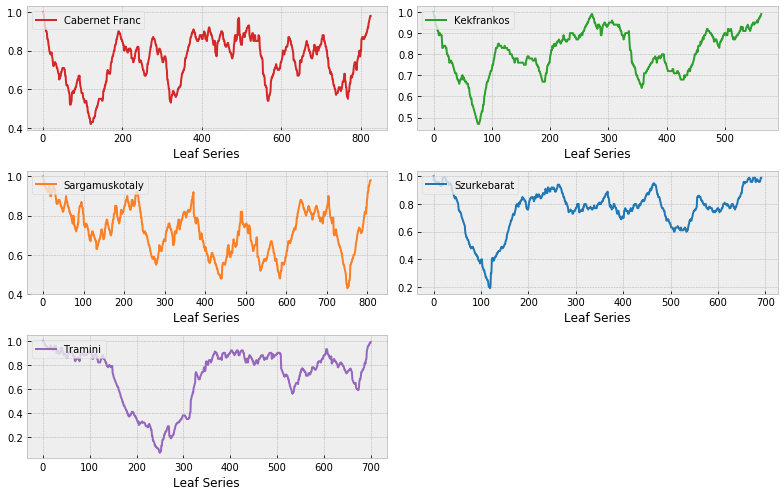

In [8]:
import matplotlib.pyplot as plt

plt.style.use('bmh')
%matplotlib inline
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,3,6,9,12]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train[r], label=lNames[y_train[r]], color=colors[i], linewidth=2)
    plt.xlabel('Leaf Series')
    plt.legend(loc='upper left')
    plt.tight_layout()

In [9]:
knn = mykNN(neighbors=5)
knn.fit(samples, sLabels, lNames)
knn.validation(xTest, yTest)
#knn.predictions(x_test)

[ 0. 40.  0. 20. 40.]
Sample identified as class Kekfrankos with 40.0% certainty, belongs to class Cabernet Franc.
[ 0. 20.  0. 40. 40.]
Sample identified as class Szurkebarat with 40.0% certainty, belongs to class Kekfrankos.
[20. 40. 40.  0.  0.]
Sample identified as class Kekfrankos with 40.0% certainty, belongs to class Sargamuskotaly.
[20.  0. 40. 20. 20.]
Sample identified as class Sargamuskotaly with 40.0% certainty, belongs to class Szurkebarat.
[20. 40.  0. 20. 20.]
Sample identified as class Kekfrankos with 40.0% certainty, belongs to class Tramini.
[40. 20. 20. 20.  0.]
Sample identified as class Cabernet Franc with 40.0% certainty, belongs to class Cabernet Franc.
[ 0. 20.  0. 40. 40.]
Sample identified as class Szurkebarat with 40.0% certainty, belongs to class Kekfrankos.
[20. 20. 20. 20. 20.]
Sample identified as class Cabernet Franc with 20.0% certainty, belongs to class Sargamuskotaly.
[20. 40.  0.  0. 40.]
Sample identified as class Kekfrankos with 40.0% certainty, be